### Importing Needed packages

In [28]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.

In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

## Reading the data and Explore it

In [39]:
df = pd.read_csv("FuelConsumption.csv")
df.head(10)
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.

In [40]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

We can plot each of these features:

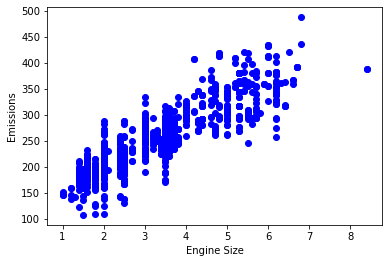

In [42]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

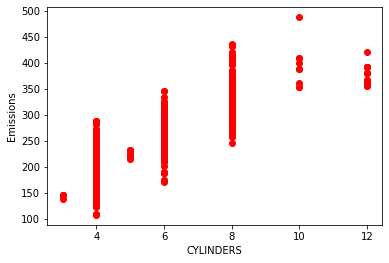

In [41]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="red")
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:


In [49]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution

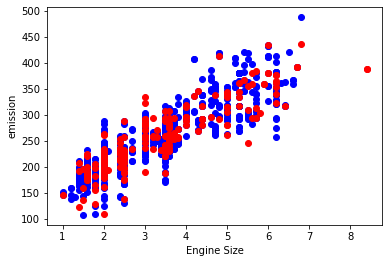

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="red")
plt.xlabel("Engine Size")
plt.ylabel("emission")
plt.show()

#### Modeling

Using sklearn package to model data.


In [51]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
print(regr.coef_)
print(regr.intercept_)

[[39.5492118]]
[123.84938114]


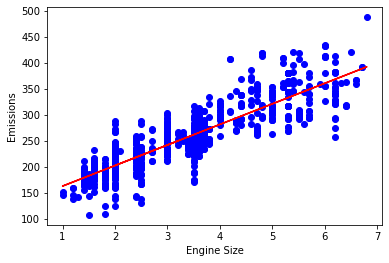

In [52]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= "blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_, "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

#### Evaluation
calcuting the r2 score and mean absolute of the model that was created

In [37]:
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_y)
print(r2_score(test_y, test_y_))
print(np.mean(np.absolute(test_y_ - test_y)))
print(np.mean(test_y_ - test_y) ** 2)

-26238.87515710973
9955.351588899484
99109025.25860348
